# 05.01

# What Is Machine Learning?

In the data science application of machine learning methods, it's more helpful to think of machine learning as a means of building models of data.

Fundamentally, machine learning involves building mathematical models to help understand data. "Learning" enters the fray when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be "learning" from the data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data. 

# 05.02

# Data Representation in Scikit-Learn

# Import the Libraries

In [1]:
import pandas as pd #
import seaborn as sns
iris=sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [2]:
X1=iris.drop('species',axis=1)
X1.shape

(150, 4)

In [3]:
y1=iris['species']
y1.shape

(150,)

# Scikit-Learn's Estimator API

API stands for Application Programming Interface.

What is an API?
An API is a set of programming code that enables data transmission between one software product and another. It also contains the terms of this data exchange.

How do APIs work?
The working principle of an API is commonly expressed through the request-response communication between a client and a server. The client is any front-end application that a user interacts with. The server is in charge of backend logic and database operations. In this scenario, an API works as a middle layer between the client and the server, making it possible to send data requests and responses.



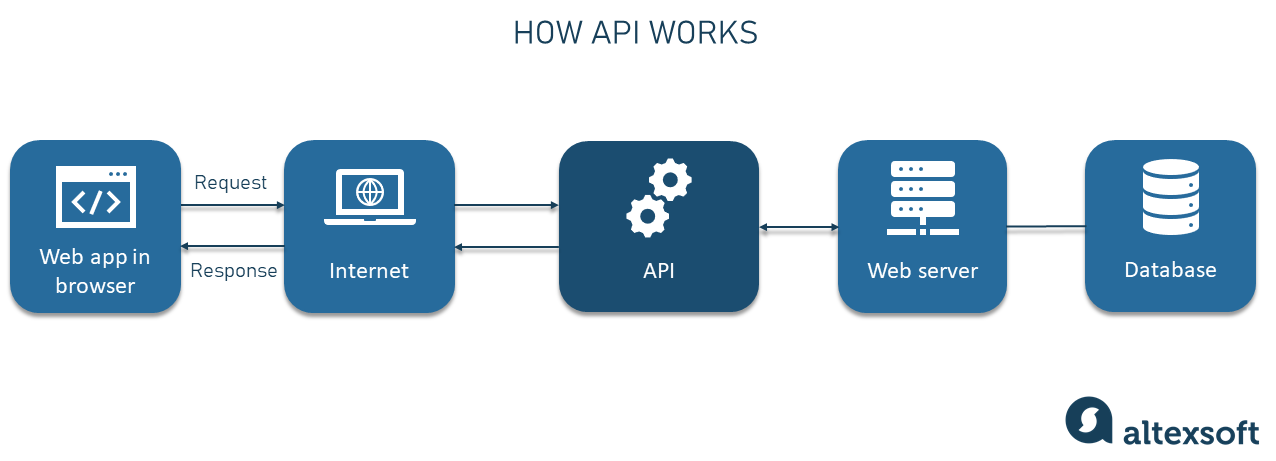

# Basics of the API

# Supervised learning example: Simple linear regression

C:\Users\Invisible Boy\AppData\Local\Temp\ipykernel_25976\4004623137.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x,y,color='hotpink',s=50,cmap='viridis') # s=size


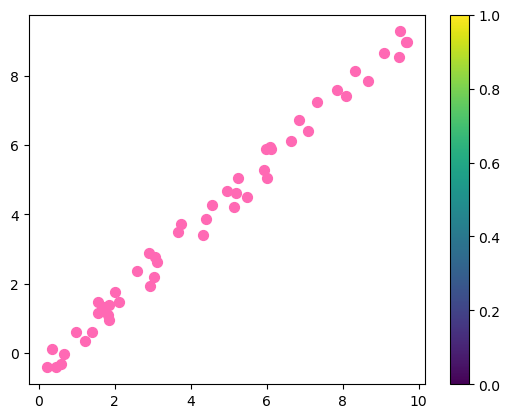

In [4]:
import matplotlib.pyplot as plt
import numpy as np
rng=np.random.RandomState(42)
x=10*rng.rand(50)
y=1*x-1+rng.rand(50)
plt.scatter(x,y,color='hotpink',s=50,cmap='viridis') # s=size
plt.colorbar()

C:\Users\Invisible Boy\anaconda3\Lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


<Axes: >

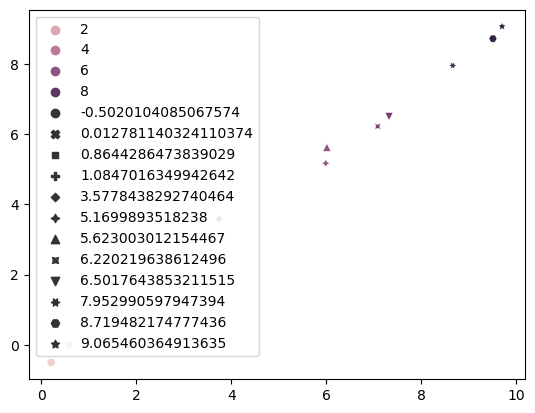

In [5]:
rng=np.random.RandomState(42)
x=10*rng.rand(12)
y=1*x-1+rng.rand(12)
sns.scatterplot(x=x,y=y,color='hotpink',cmap='viridis',hue=x,style=y)

# 1. Choose a class of model

In [6]:
from sklearn.linear_model import LinearRegression

# 2. Choose model hyperparameters

In [7]:
model=LinearRegression(fit_intercept=True)
model

LinearRegression()

# 3. Arrange data into a features matrix and target vector

In [8]:
# Using np.newaxis will increase the dimensions of your array by one dimension when used once.
#This means that a 1D array will become a 2D array, a 2D array will become a 3D array, and so on.
X=x[:,np.newaxis]
X.shape

(12, 1)

# 4. Fit the model to your data

In [9]:
model.fit(X,y)

LinearRegression()

In [10]:
model.coef_

array([0.9803803])

In [11]:
model.intercept_

-0.5344281801267279

# 5. Predict labels for unknown data

In [12]:
xfit=np.linspace(-1,11,20)

In [13]:
Xfit=xfit[:,np.newaxis]
yfit=model.predict(Xfit)
yfit

array([-1.51480848, -0.89562092, -0.27643336,  0.3427542 ,  0.96194176,
        1.58112931,  2.20031687,  2.81950443,  3.43869199,  4.05787955,
        4.67706711,  5.29625467,  5.91544223,  6.53462979,  7.15381735,
        7.77300491,  8.39219247,  9.01138003,  9.63056759, 10.24975515])

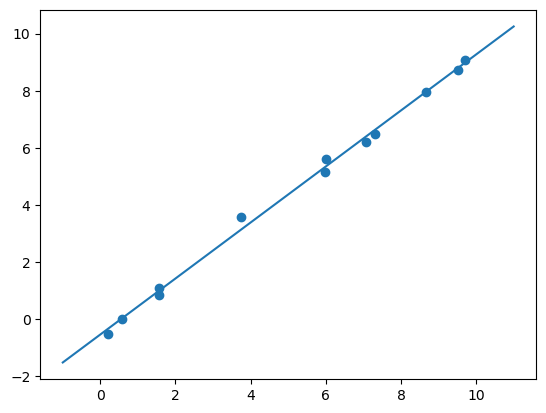

In [14]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [15]:
y1.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X1,y1,random_state=1)

In [17]:
ytrain.shape

(112,)

In [18]:
from sklearn.naive_bayes import GaussianNB 
model=GaussianNB()
model.fit(Xtrain,ytrain)
y_pred=model.predict(Xtest)

In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(ytest,y_pred)

0.9736842105263158

Text(113.9222222222222, 0.5, 'True value')

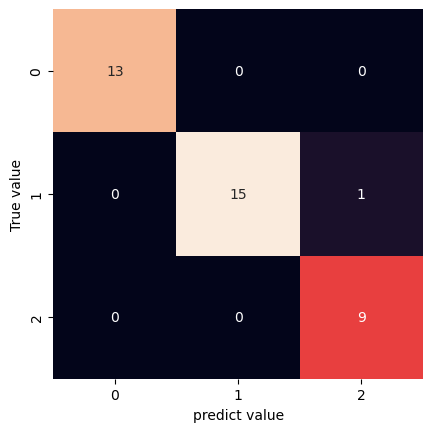

In [20]:
mat=confusion_matrix(ytest,y_pred)
sns.heatmap(mat,square=True,cbar=False,annot=True)
plt.xlabel('predict value')
plt.ylabel('True value')

# Unsupervised learning example: Iris dimensionality

In [21]:
from sklearn.decomposition import PCA
model=PCA(n_components=2)
model.fit(X1)
X_2D=model.transform(X1)
print(X1.shape)
X_2D.shape

(150, 4)


(150, 2)

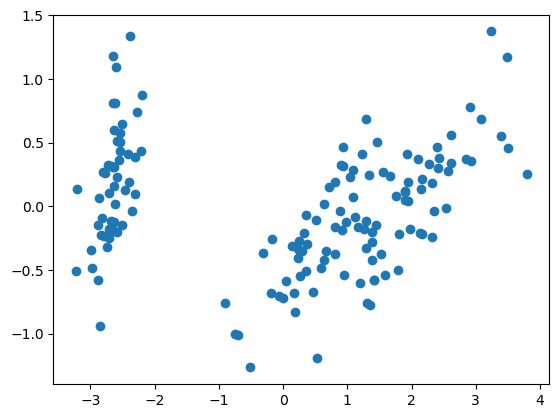

In [22]:
plt.scatter(X_2D[:,0],X_2D[:,1])

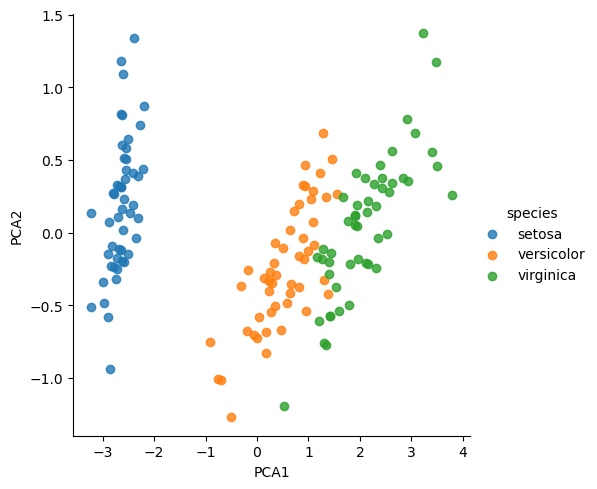

In [23]:
iris['PCA1']=X_2D[:,0]
iris['PCA2']=X_2D[:,1]
sns.lmplot(x='PCA1',y='PCA2',data=iris,hue='species',fit_reg=False)

# Unsupervised learning: Iris clustering

In [24]:
from sklearn.mixture import GaussianMixture
model=GaussianMixture(n_components=2,covariance_type='full')
model.fit(X1)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X1)       # 4. Determine cluster labels
y_gmm

C:\Users\Invisible Boy\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

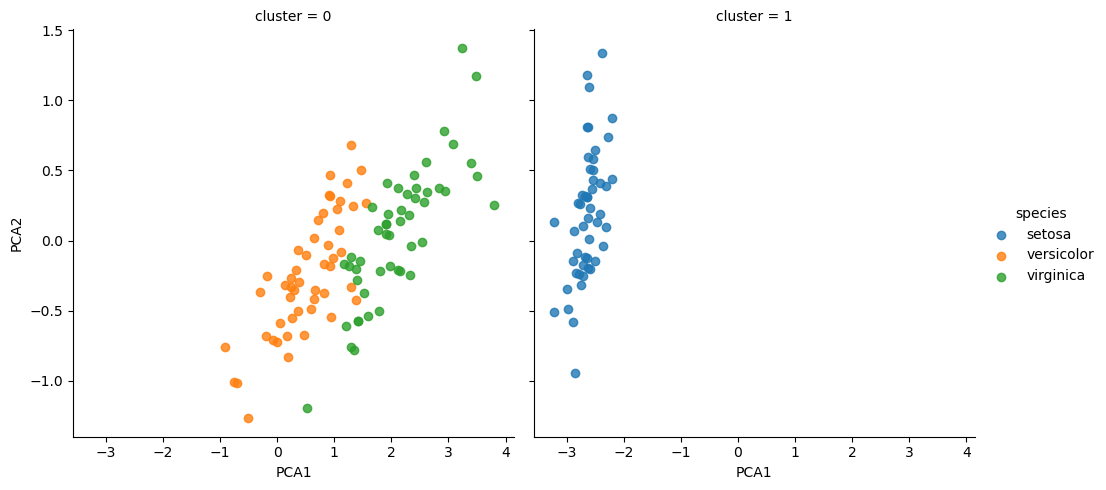

In [25]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

# 05.03

# Hyperparameters and Model Validation

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [36]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=2)
model.fit(X,y)
y_pred=model.predict(X)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

0.98

# Model validation the right way: Holdout sets

that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. 

In [39]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.8933333333333333

# Model validation via cross-validation

In [40]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)
#cross-validation is a two-fold cross-validation—that is, one in which we have split the data into two sets and used each 
#in turn as a validation set.

(0.9866666666666667, 0.8933333333333333)

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,X,y,cv=6)

array([0.96, 0.96, 0.88, 0.96, 0.88, 1.  ])

In [45]:
from sklearn.model_selection import LeaveOneOut
cross_val_score(model,X,y,cv=LeaveOneOut())

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
PolynomialRegression()

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [51]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting


In [65]:
X_test = np.linspace(-0.1, 1.1, 500)[:,np.newaxis]
X_test.shape

(500, 1)

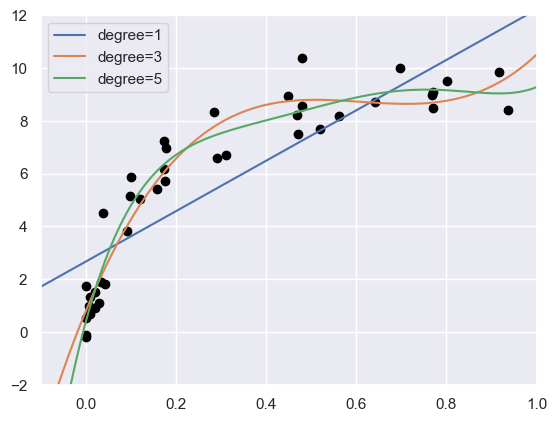

In [70]:
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

In [71]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                           param_name='polynomialfeatures__degree',param_range=degree,cv=7)


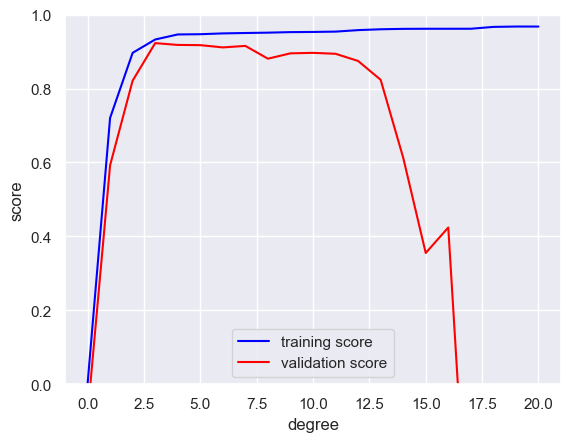

In [73]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

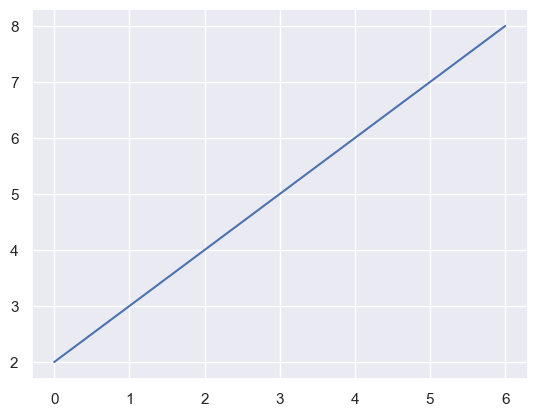

In [78]:
x=[2,3,4,5,6,7,8]
plt.plot(x)

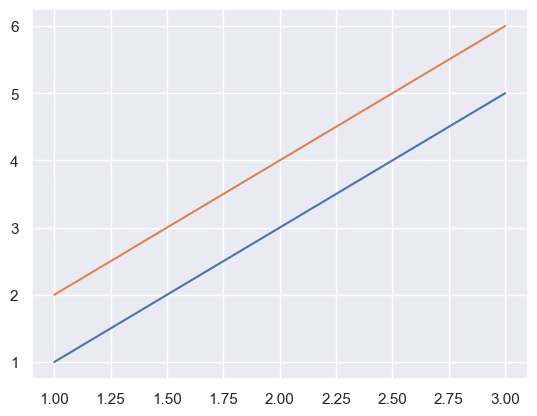

In [79]:
x = [1, 2, 3]
y = np.array([[1, 2], [3, 4], [5, 6]])
plt.plot(x, y)

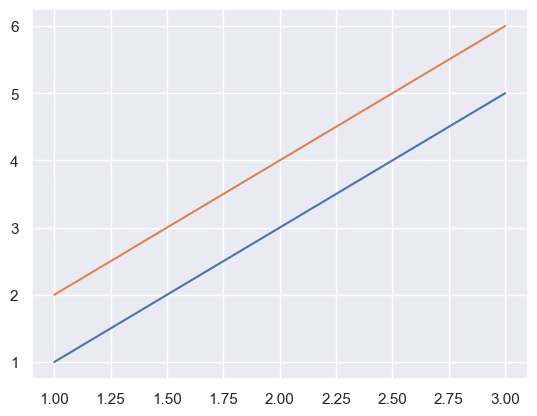

In [80]:
for col in range(y.shape[1]):
    plt.plot(x, y[:, col])